<a href="https://colab.research.google.com/github/sid-betalol/CS6910-FODL-Assignment1/blob/main/cs6910_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### To add
1. adding wandb logger
2. breaking the notebook down to scripts based on code implementation instructions
3. early stopping if possible

###**wandb setup**

In [1]:
# !pip install wandb

In [2]:
# import wandb
# wandb.login()

###**Importing the required libraries**


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##**Template Class for Activation Functions**

In [4]:
class daddyActivation():
    def __init__(self, *args, **kwargs):
        """
        Constructor
        """
        self.grads = {}
        self.backprop_cache = {}

    def __call__(self, *args, **kwargs):
        """
        Calling the class as a function instance
        does a forward and a backward pass
        """
        op = self.forward(*args, **kwargs)
        self.grads = self.calc_grads(*args, **kwargs)
        return op

    def forward(self, *args, **kwargs):
        """
        Defining the forward pass of the activation function
        """
        pass
    
    def calc_grads(self, *args, **kwargs):
        """
        Calculates the gradient of the activation function
        with respect to its input
        """
        pass
    
    def backward(self, *args, **kwargs):
        """ 
        Calculates the gradients of the loss with respect 
        to the input of the activation function, using the gradients 
        computed in the calc_grads method
        """
        pass

###**Activation Functions**

In [5]:
class Sigmoid(daddyActivation):
    
    def __init__(self):
        
        super().__init__()

    def forward(self, x):
        
        self.backprop_cache = 1/(1+np.exp(-x))
        return self.backprop_cache

    def calc_grads(self, x):
        
        id = "x"
        y = self.backprop_cache
        diff = y*(1-y)
        return {id:diff}

    def backward(self, y_hat):
        
        return self.grads['x']*y_hat


class Tanh(daddyActivation):
    
    def __init__(self):
        
        super().__init__()

    def forward(self, x):
        
        self.backprop_cache = (np.exp(x) - np.exp(-x))/(np.exp(-x)+np.exp(x))
        return self.backprop_cache

    def calc_grads(self, x):
        
        id = "x"
        y = self.backprop_cache
        diff = 1- y**2
        return {id:diff}

    def backward(self, y_hat):
        
        return self.grads['x']*y_hat


class ReLU(daddyActivation):

    def __init__(self):
        
        super().__init__()

    def forward(self, x):
        
        self.backprop_cache = np.maximum(x, 0.0)
        return self.backprop_cache

    def calc_grads(self,x):
        
        id = "x"
        y = self.backprop_cache
        diff = (y > 0).astype("float")
        return {id:diff}

    def backward(self, y_hat):
        
        return self.grads['x']*y_hat


class LeakyReLU(daddyActivation):
    
    def __init__(self, alpha=0.1):
        super().__init__()
        self.alpha = alpha
    
    def forward(self, x):
        self.backprop_cache = np.maximum(x, self.alpha*x)
        return self.backprop_cache
    
    def calc_grads(self, x):
        id = "x"
        y = self.backprop_cache
        diff = np.where(y > 0, 1, self.alpha)
        return {id: diff}
    
    def backward(self, y_hat):
        return self.grads['x']*y_hat

##**Template Class for Loss Functions**

In [6]:
class daddyLoss():
    
    def __init__(self, *args, **kwargs):
        
        self.grads = {}
        self.backprop_cache = {}

    def __call__(self, y_pred, y_true, *args, **kwargs):
        
        op = self.forward(y_pred, y_true, *args, **kwargs)
        self.grads = self.calc_grads(y_pred, y_true, *args, **kwargs)
        return op

    def forward(self, y_pred, y_true, *args, **kwargs):
        
        pass

    def calc_grads(self, y_pred, y_true, *args, **kwargs):
        
        pass

    def backward(self, *args, **kwargs):
        
        return self.grads['x']

###**Helper Functions for Loss (Output Function: Softmax)**

In [7]:
# softmax will be used for the output layer
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis= -1, keepdims=True))
    return exp_x/ np.sum(exp_x, axis = -1, keepdims=True)

###**Loss Functions**

In [8]:
class MSE(daddyLoss):
    
    def __init__(self):
        
        super().__init__()

    def forward(self, y_pred, y_true):
        
        num_classes = y_pred.shape[-1]
        probabs = softmax(y_pred)
        y_true_encoding = np.eye(num_classes, dtype = int)[np.array(y_true).astype(int)]
        self.backprop_cache['y_true'] = y_true_encoding
        loss = np.mean(np.sum((probabs - y_true_encoding)**2, axis=1))
        self.backprop_cache['probabs'] = probabs
        return loss

    def calc_grads(self, y_pred, y_true):
        
        batch_size = y_pred.shape[0]
        grad = 2*(self.backprop_cache["probabs"] - self.backprop_cache["y_true"])
        grad = grad/batch_size
        return {'x': grad}

class LogLoss(daddyLoss):

    def __init__(self):
        
        super().__init__()

    def forward(self, y_pred, y_true):
        
        num_classes = y_pred.shape[-1]
        probabs = softmax(y_pred)
        y_true_encoding = np.eye(num_classes, dtype = int)[np.array(y_true).astype(int)]
        self.backprop_cache['y_true'] = y_true_encoding
        loss = np.mean(- np.log(probabs[np.arange(y_pred.shape[0]), y_true]))
        self.backprop_cache['probabs'] = probabs
        return loss

    def calc_grads(self, y_pred, y_true):
        
        batch_size = y_pred.shape[0]
        grad = self.backprop_cache["probabs"] - self.backprop_cache["y_true"]
        grad = grad/batch_size
        return {'x':grad}

##**Template Class for Optimizers**

In [9]:
class daddyOptimizer():
    
    def __init__(self, *args, **kwargs):
        
        self.history = {}
        pass

    def update_weights(self, layer, *args, **kwargs):
        
        update = self.calc_update(layer)
        for k, v in layer.weights.items():
            layer.weights[k] = layer.weights[k] + update[k]

    def calc_update(self, layer, *args, **kwargs):
        #needs to be overloaded based on the optimizer
        pass

###**Optimizers**
SGD update rule: https://iitm-pod.slides.com/arunprakash_ai/cs6910-lecture-5#/0/56/7

Momentum Update Rule: https://iitm-pod.slides.com/arunprakash_ai/cs6910-lecture-5#/0/40/7

NAG Update Rule: https://iitm-pod.slides.com/arunprakash_ai/cs6910-lecture-5#/0/50/7

Simplied NAG Update Rule: 
1. [ADVANCES IN OPTIMIZING RECURRENT NETWORKS, Bengio et al.](https://arxiv.org/pdf/1212.0901.pdf); 
2. [Sections 7.1 and 7.2 of Ilya Sutskever's PhD. Thesis: TRAINING RECURRENT NEURAL NETWORKS](https://www.cs.utoronto.ca/~ilya/pubs/ilya_sutskever_phd_thesis.pdf); 
3. Brief Mathematical Intuition: [Neural Network Nesterov Momentum by James D. McCaffrey](https://jamesmccaffrey.wordpress.com/2017/07/24/neural-network-nesterov-momentum/);
4. [Various Formulations of NAG](https://jlmelville.github.io/mize/nesterov.html)

RMSProp Update Rule: https://iitm-pod.slides.com/arunprakash_ai/cs6910-lecture-52#/0/18/5

Adam Update Rule: https://iitm-pod.slides.com/arunprakash_ai/cs6910-lecture-52#/0/40/10

NAdam Update Rule: https://iitm-pod.slides.com/arunprakash_ai/cs6910-lecture-52#/0/68

Add a comment to remark about bias correction in Adam/NAdam

Summary of optimizers: https://blog.paperspace.com/intro-to-optimization-momentum-rmsprop-adam/

In [10]:
class SGD(daddyOptimizer):

    def __init__(self, learning_rate = 0.01):

        super().__init__()
        self.learning_rate = learning_rate

    def calc_update(self, layer):

        update = {}
        for k,v in layer.weights.items():
            update[k] = -self.learning_rate*layer.del_theta[k]
        return update

class Momentum(daddyOptimizer):

    def __init__(self, learning_rate = 0.001, beta = 0.9):

        super().__init__()
        self.learning_rate = learning_rate
        self.beta = beta

    def calc_update(self, layer):

        update = {}
        
        for k, v in layer.weights.items():
            if layer.__str__() + k in self.history.keys():
                self.history[layer.__str__() + k]['u'] = self.beta*self.history[layer.__str__() + k]['u'] + self.learning_rate*layer.del_theta[k]
                
            else:
                self.history[layer.__str__() + k] = {}
                self.history[layer.__str__() + k]['u'] = self.learning_rate*layer.del_theta[k]

            update[k] = -self.history[layer.__str__() + k]['u']

        return update

class Nesterov(daddyOptimizer):
    # Implemented Bengio Nesterov Momentum
    # References:
    # [ADVANCES IN OPTIMIZING RECURRENT NETWORKS, Bengio et al.](https://arxiv.org/pdf/1212.0901.pdf)
    # [Sections 7.1 and 7.2 of Ilya Sutskever's PhD. Thesis: TRAINING RECURRENT NEURAL NETWORKS](https://www.cs.utoronto.ca/~ilya/pubs/ilya_sutskever_phd_thesis.pdf)
    # Brief Mathematical Intuition: [Neural Network Nesterov Momentum by James D. McCaffrey](https://jamesmccaffrey.wordpress.com/2017/07/24/neural-network-nesterov-momentum/)
    # [Various Formulations of NAG](https://jlmelville.github.io/mize/nesterov.html)

    def __init__(self, learning_rate = 0.001, beta = 0.9):

        super().__init__()
        self.learning_rate = learning_rate
        self.beta = beta

    def calc_update(self, layer):

        update = {}
        for k, v in layer.weights.items():
            if layer.__str__() + k in self.history.keys():
                update[k] = self.beta*self.beta*self.history[layer.__str__() + k]['u'] - (1+self.beta)*self.learning_rate*layer.del_theta[k]
            else:
                self.history[layer.__str__() + k] = {}
                self.history[layer.__str__() + k]['u'] = 0
                update[k] = -self.learning_rate*layer.del_theta[k]
            self.history[layer.__str__() + k]['u'] = self.beta*self.history[layer.__str__() + k]['u'] - self.learning_rate*layer.del_theta[k]

        return update

class RMSProp(daddyOptimizer):

    def __init__(self, learning_rate = 0.001, beta = 0.9, epsilon = 1e-7):

        super().__init__()
        self.learning_rate = learning_rate
        self.beta = beta
        self.epsilon = epsilon

    def calc_update(self, layer):

        update = {}

        for k,v in layer.weights.items():
            if layer.__str__() + k in self.history.keys():
                self.history[layer.__str__() + k]['u'] = self.beta*self.history[layer.__str__() + k]['u'] + (1 - self.beta)*(layer.del_theta[k]**2)
            else:
                self.history[layer.__str__() + k] = {}
                self.history[layer.__str__() + k]['u'] = (1-self.beta)*(layer.del_theta[k]**2)
                
            sqrt_term = np.sqrt(self.history[layer.__str__() + k]['u'] + self.epsilon)
            # update[k] = -(self.learning_rate*layer.weights[k]/sqrt_term)
            update[k] = -(self.learning_rate*layer.del_theta[k]/sqrt_term)

        return update

class Adam(daddyOptimizer):

    def __init__(self, learning_rate = 0.001, epsilon = 1e-7, beta1 = 0.9, beta2 = 0.999):

        super().__init__()
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.beta1 = beta1
        self.beta2 = beta2
        self.steps = 1

    def calc_update(self, layer):

        update = {}

        for k,v in layer.weights.items():
            if layer.__str__() + k in self.history.keys():
                self.history[layer.__str__() + k]['m'] = self.beta1*self.history[layer.__str__() + k]['m'] + (1 - self.beta1)*layer.del_theta[k]
                self.history[layer.__str__() + k]['u'] = self.beta2*self.history[layer.__str__() + k]['u'] + (1 - self.beta2)*(layer.del_theta[k]**2)

            else:
                self.history[layer.__str__() + k] = {}
                self.history[layer.__str__() + k]['m'] = (1 - self.beta1)*layer.del_theta[k]
                self.history[layer.__str__() + k]['u'] = (1 - self.beta2)*(layer.del_theta[k]**2)

            corrected_avg = self.history[layer.__str__() + k]['m']/(1-(self.beta1)**self.steps)
            corrected_squared_avg = self.history[layer.__str__() + k]['u']/(1-(self.beta2)**self.steps)

            sqrt_term = np.sqrt(corrected_squared_avg) + self.epsilon
            update[k] = -(self.learning_rate*corrected_avg/sqrt_term)

        self.steps+=1
        return update

class NAdam(daddyOptimizer):

    def __init__(self, learning_rate = 0.001, epsilon = 1e-7, beta1 = 0.9, beta2 = 0.999):

        super().__init__()
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.beta1 = beta1
        self.beta2 = beta2
        self.steps = 1

    def calc_update(self, layer):

        update = {}

        for k,v in layer.weights.items():
            if layer.__str__() + k in self.history.keys():
                self.history[layer.__str__() + k]['m'] = self.beta1*self.history[layer.__str__() + k]['m'] + (1 - self.beta1)*layer.del_theta[k]
                self.history[layer.__str__() + k]['u'] = self.beta2*self.history[layer.__str__() + k]['u'] + (1 - self.beta2)*(layer.del_theta[k]**2)
            else:
                self.history[layer.__str__() + k] = {}
                self.history[layer.__str__() + k]['m'] = (1 - self.beta1)*layer.del_theta[k]
                self.history[layer.__str__() + k]['u'] = (1 - self.beta2)*(layer.del_theta[k]**2)

            corrected_avg = self.history[layer.__str__() + k]['m']/(1-(self.beta1)**self.steps)
            corrected_squared_avg = self.history[layer.__str__() + k]['u']/(1-(self.beta2)**self.steps)

            sqrt_term = np.sqrt(corrected_squared_avg) + self.epsilon
            delta_coeff = (1-self.beta1)/(1-self.beta1**self.steps)

            update[k] = -((self.learning_rate/sqrt_term)*(self.beta1*corrected_avg + delta_coeff*layer.del_theta[k]))

        self.steps+=1
        return update

##**Template Class for Layers**

In [11]:
class daddyLayer():

    def __init__(self, *args, **kwargs):
        
        self.grads = {}
        self.weights = {}
        self.backprop_cache = {}
        self.optimizer = None

    def __call__(self, *args, **kwargs):

        op = self.forward(*args, **kwargs)
        self.grads = self.calc_grads(*args, **kwargs)
        return op

    def init_weights(self, *args, **kwargs):
        pass

    def forward(self, *args, **kwargs):
        pass

    def calc_grads(self, *args, **kwargs):
        pass

    def backward(self, *args, **kwargs):
        pass

    def update_weights(self, *args, **kwargs):
        
        self.optimizer.update_weights(self)

####**Helper Functions (weight initialization)**

In [12]:
def weight_initialization(init_method, in_dim, out_dim):
    if init_method == 'random':
        weights = np.random.randn(in_dim, out_dim)*np.sqrt(1.0/in_dim)
        biases = np.random.randn(1, out_dim)*np.sqrt(1.0/in_dim)
    elif init_method == 'xavier':
        max = np.sqrt(6 / (in_dim + out_dim))
        min = -max
        weights = np.random.uniform(low = min, high = max, size = (in_dim, out_dim))
        biases = np.random.uniform(low = min, high = max, size = (1, out_dim))
    elif init_method == 'kaiming':
        weights = np.random.randn(in_dim, out_dim) * np.sqrt(2.0/in_dim)
        biases = np.random.randn(1, out_dim) * np.sqrt(2.0/in_dim)
    return weights, biases

###**Layers of a Feedforward neural network**
reference used for xavier and kaiming initialization: https://towardsdatascience.com/weight-initialization-in-neural-networks-a-journey-from-the-basics-to-kaiming-954fb9b47c79

In [13]:
class FNNLayer(daddyLayer):
    
    def __init__(self, in_dim, out_dim, weight_decay = None, init_method = 'random'):

        super().__init__()
        self.in_dim = in_dim
        self.out_dim = out_dim
        self.weight_decay = weight_decay
        self.init_method = init_method
        self.init_weights()

    def init_weights(self):

        self.weights['w'], self.weights['b'] = weight_initialization(self.init_method, self.in_dim, self.out_dim)

    def forward(self, x):

        self.backprop_cache['x'] = x
        op = np.einsum('ij,jk->ik', x, self.weights["w"]) + self.weights["b"]
        return op

    def calc_grads(self, x):

        dels = {}
        dels['w'] = np.einsum('ij -> ji', self.backprop_cache['x'])
        dels['x'] = np.einsum('ij -> ji', self.weights['w'])

        return dels

    def backward(self, y_hat):
      
        x_hat = np.einsum('ij,jk->ik', y_hat, self.grads["x"])
        w_hat = np.einsum('ij,jk->ik', self.grads["w"], y_hat)
        
        b_hat = np.sum(y_hat, axis=0, keepdims=True)
        if self.weight_decay:
            w_hat = w_hat + 2 * self.weight_decay * self.weights["w"]
            b_hat = b_hat + 2 * self.weight_decay * self.weights["b"]
        self.del_theta = {'w': w_hat, 'b': b_hat}
        return x_hat

    def update_weights(self):

        self.optimizer.update_weights(self)

## **Neural Network**

#### **Helper Functions**

In [14]:
def acc_score(true_labels, pred_labels):
    return np.sum(true_labels == pred_labels)/len(true_labels)

def deepcopy(arr):
    
    if isinstance(arr, np.ndarray):
        return np.array([deepcopy(elem) for elem in arr])
    else:
        return arr

def make_data_batches(X, y, batch_size=32):
        batches = []

        for i in range(len(y) // batch_size):
            start_idx = batch_size * i
            end_idx = batch_size * (i + 1)

            batches.append([X[start_idx: end_idx], y[start_idx: end_idx]])

        # take care of the last batch which might have batch_size 
        # less than the specified one
        if len(y) % batch_size != 0:
            batches.append([X[end_idx:], y[end_idx:]])

        return batches

In [15]:
class NN():

    def __init__(self, layers, *args, **kwargs):

        self.layers = layers
        self.history = []

    def __call__(self, *args, **kwargs):

        return self.forward(*args, **kwargs)

    def compile(self, loss, optimizer, *args, **kwargs):

        self.loss = loss
        for layer in self.layers:
            if (isinstance(layer, daddyLayer) or isinstance(layer, FNNLayer)) and layer.optimizer == None:
                layer.optimizer = deepcopy(optimizer)
    
    def forward(self, x, *args, **kwargs):
        
        for layer in self.layers:
            x = layer(x)
        return x

    def backward(self, *args, **kwargs):
        
        grad = self.loss.backward()
        for layer in reversed(self.layers):
            grad = layer.backward(grad)

        return grad

    def update_weights(self, *args, **kwargs):

        for layer in reversed(self.layers):
            if (isinstance(layer, daddyLayer) or isinstance(layer, FNNLayer)):
                layer.update_weights()

    def fit(self, X_train, Y_train, X_val, Y_val, batch_size = 32, epochs = 10):
        
        self.loss.num_classes = len(np.unique(Y_train))
        tr_batch = make_data_batches(X_train, Y_train, batch_size=batch_size)
        val_batch = make_data_batches(X_val, Y_val, batch_size=batch_size)
        tr_batch_size = len(tr_batch)
        val_batch_size = len(val_batch)

        for epoch in range(1, epochs+1):

            tr_loss = 0
            tr_acc = 0

            for X_t, Y_t in tr_batch:
                preds = self(X_t)
                tr_loss += self.loss(preds, Y_t)
                tr_acc += acc_score(np.argmax(preds, axis = 1), Y_t)
                self.backward()
                self.update_weights()
                
            mean_tr_loss = tr_loss / tr_batch_size
            mean_tr_acc = tr_acc / tr_batch_size
            val_loss = 0
            val_acc = 0

            for X_v, Y_v in val_batch:
                val_preds = self(X_v)
                val_loss += self.loss(val_preds, Y_v)
                val_acc += acc_score(np.argmax(val_preds, axis = 1), Y_v)

            mean_val_loss = val_loss / val_batch_size
            mean_val_acc = val_acc / val_batch_size

            print(f"Epoch: {epoch} Train Loss: {mean_tr_loss} Train Accuracy: {mean_tr_acc} Validation Loss: {mean_val_loss} Validation Accuracy: {mean_val_acc}")

            self.history.append({"Epoch" : epoch, "Train Loss": mean_tr_loss,"Train Accuracy": mean_tr_acc,"Val Loss": mean_val_loss,"Val Accuracy": mean_val_acc})
            
        print('Model trained!')

    def evaluate(self, X_test, Y_test):

        preds = self(X_test)
        test_loss = self.loss(preds, Y_test)
        accuracy = acc_score(np.argmax(preds, axis = 1), Y_test)

        print(f"Test loss: {test_loss} Test accuracy: {accuracy}")

###**Fashion MNIST**

####**Importing the data**

In [16]:
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
np.random.seed(42)
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

# print('Train Data:')
# print('X:', X_train.shape)
# print('Y:', Y_train.shape)
# print()
# print('Test Data:')
# print('X:', X_test.shape)
# print('Y:', Y_test.shape)

4422102/4422102 [==============================] - 0s 0us/step


####**Classwise Sample from Data**

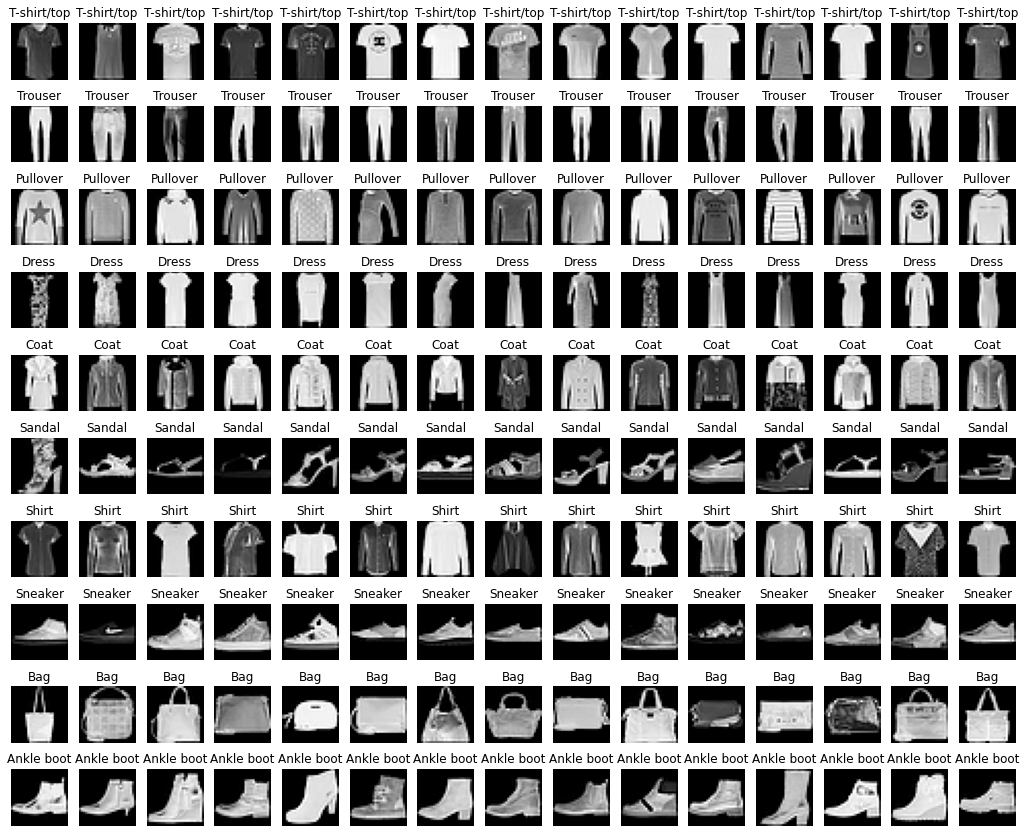

In [17]:
# Y_train is used instead of Y_test, as training data is expected
# to have samples from every class unlike the test data
num_labels = np.unique(Y_train).shape[0]
# print(num_labels) ## prints 10 in accordance with the keras dataset
labels = [
    'T-shirt/top', 
    'Trouser', 
    'Pullover', 
    'Dress', 
    'Coat', 
    'Sandal', 
    'Shirt', 
    'Sneaker', 
    'Bag', 
    'Ankle boot',
    ]
def show_samples(n, X = X_train, Y = Y_train, num_classes = num_labels, classes = labels):
    # n : number of samples to be shown from each class
    
    # samples divided by class
    labelled_data = {i: X_train[Y_train==i] for i in range(num_classes)}
    
    # maximum number of available samples in each class  
    max_samples = {i:len(labelled_data[i]) for i in range(num_classes)}

    # samples from class to be shown in random order
    shuffled_indices = {i: np.random.permutation(max_samples[i]) for i in range(num_classes)}
    
    # maximum number of available samples will be shown if the user 
    # asks for more samples than available to be shown
    num_samples = {i: min(max_samples[i], n) for i in range(num_classes)}

    fig, axs = plt.subplots(nrows = 10, ncols = max(num_samples.values()), figsize=(1.2*max(num_samples.values()), 15))
    for i in range(10):
        for j in range(num_samples[i]):
            img = labelled_data[i][shuffled_indices[i][j]].astype(np.uint8).reshape(28, 28)
            axs[i, j].imshow(img, cmap="gray")
            axs[i, j].axis("off")
            axs[i, j].set_title(classes[i])
    plt.show()

show_samples(15)

####**Helper Function for flattening the images**

In [18]:
def flatten(arr):
    arr = arr.reshape(arr.shape[0], -1)
    return arr

####**Preprocessing the data**

In [19]:
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train = X_train/255.0
Y_train = Y_train
X_train = flatten(X_train)
X_test = flatten(X_test)/255.0
X_tr, X_val, Y_tr, Y_val = train_test_split(X_train, Y_train, test_size=0.1, shuffle=True)

####**Training and Testing the Neural Network Model**

In [20]:
model = NN([FNNLayer(784, 256, weight_decay = 0.0005, init_method = 'kaiming'), ReLU(), FNNLayer(256, 64, weight_decay = 0.0005, init_method = 'kaiming'), ReLU(), FNNLayer(64, 10, weight_decay = 0.0005, init_method = 'kaiming')])
optimizer = Adam()
loss = LogLoss()
model.compile(loss, optimizer)
model.fit(X_tr, Y_tr, X_val, Y_val, batch_size=64, epochs=5)
model.evaluate(X_test, Y_test)

Epoch: 1 Train Loss: 0.5172736096911449 Train Accuracy: 0.8166469194312796 Validation Loss: 0.4061243607151787 Validation Accuracy: 0.8549423758865248
Epoch: 2 Train Loss: 0.40029467074712227 Train Accuracy: 0.8553576718009479 Validation Loss: 0.3865607843101568 Validation Accuracy: 0.8574357269503545
Epoch: 3 Train Loss: 0.3724168405200573 Train Accuracy: 0.8640587973933649 Validation Loss: 0.3737530763448 Validation Accuracy: 0.8652482269503545
Epoch: 4 Train Loss: 0.3575085132769409 Train Accuracy: 0.8701619273301737 Validation Loss: 0.35395398595437255 Validation Accuracy: 0.8696254432624114
Epoch: 5 Train Loss: 0.3467510400460839 Train Accuracy: 0.8731116706161137 Validation Loss: 0.3462965972494957 Validation Accuracy: 0.874113475177305
Model trained!
Test loss: 0.38642443079751504 Test accuracy: 0.86
